## Bivariate Analysis

* Bivariate analysis is a statistical method that helps you study relationships (correlation) between data sets

### Quantitative vs. Quantitative
    1. Scatterplot
    2. Line plot

### Categorical vs. Quantitative
    1. Bar chart (on summary statistics)
    2. Grouped kernel density plots
    3. Box plots
    4. Violin plots


### Categorical vs. Categorical
    1. Stacked bar chart
    2. Grouped bar chart
    3. Segmented bar chart


## Case study 1


### Problem Feature:(Heart Disease)

### Data Set: 

   * age - age in years 
   * sex - (1 = male; 0 = female) 
   * cp - chest pain type 
   * trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
   * chol - serum cholestoral in mg/dl 
   * fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
   * restecg - resting electrocardiographic results 
   * exang - exercise induced angina (1 = yes; 0 = no) 
   * oldpeak - ST depression induced by exercise relative to rest 
   * slope - the slope of the peak exercise ST segment 
   * ca - number of major vessels (0-3) colored by flourosopy 
   * thal - 3 = normal; 6 = fixed defect; 7 = reversable defect 
   * target - have disease or not (1=yes, 0=no)



### 1.1 Loading the libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir

print(listdir())

['.ipynb_checkpoints', 'AirPassengers.csv', 'EDA-TakeHome-Questions-Day3.ipynb', 'heart.csv']


### 1.2 import the dataset ?

In [9]:
df = pd.read_csv('./heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 1.3 How to see the size of your data?

In [10]:
df.shape

(303, 14)

### 1.4 How to view the statistical characteristics of the data?

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 1.5 How to see just one column?

In [14]:
df['cp']

0      3
1      2
2      1
3      1
4      0
      ..
298    0
299    3
300    0
301    0
302    1
Name: cp, Length: 303, dtype: int64

### 1.6 How to check the column names?

In [15]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### 1.7 Find the Numerical Features,Categorical Features, Alphanumeric Features?

In [20]:
df.select_dtypes(include=["number"]).columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [23]:
df.select_dtypes(include=["category"]).columns

Index([], dtype='object')

In [25]:
df.select_dtypes(include=["object"]).columns

Index([], dtype='object')

#### Change the column names?

In [33]:
#Change the sex(0,1)=(female,male)
lookup = {0:"female",1:"male"}
df['sex'] = df['sex'].apply(lambda x: lookup[x])

## 1.8 Categorical vs. Quantitative

    * Categorical: chest_pain_type, Sex, fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_slope,thalassemia
    * Numerical Features: Age (Continuous), resting_blood_pressure ,cholesterol,max_heart_rate_achieved,st_depression, num_major_vessels,target

### 1.8a) Create bar plot for showing Gender and target. And your Observation:

In [34]:
df.groupby(by='sex')['target'].agg('sum')

sex
female    72
male      93
Name: target, dtype: int64

Survived population
        sum  count
sex               
female   72     96
male     93    207

sex
female    0.750000
male      0.449275
Name: target, dtype: float64


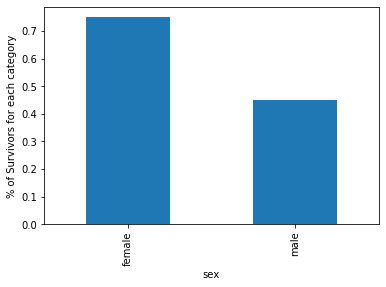

In [69]:
#draw a bar plot of target by sex
df.groupby(by='sex')['target'].agg('mean').plot.bar()
print('Survived population',df.groupby(by='sex')['target'].agg(['sum','count']),sep="\n");print()
plt.ylabel('% of Survivors for each category')

#print percentages of females vs. males Heart Disease
print(df.groupby(by='sex')['target'].agg('mean'))
plt.show()

### Observation:



- From the barplot, it can be observed that the females population have had more heart diseases (75% of female population).
- Whereas on 44% of the males, suffered from heart related diseases. 

### 1.8d) Create Bar plot for checking the both Number Of people having chest_pain_type vs Heart Disease or Not. And your Observations?

#### CP vs target

    sum  count      mean
cp                      
0    39    143  0.272727
1    41     50  0.820000
2    69     87  0.793103
3    16     23  0.695652


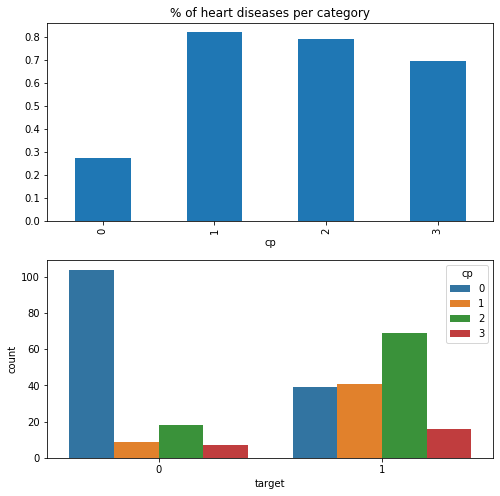

In [77]:
# create subplot plot
fig,ax = plt.subplots(2,1,figsize=(8,8))

# create bar plot using groupby
print(df.groupby(by="cp")['target'].agg(['sum','count','mean']))
df.groupby(by="cp")['target'].agg('mean').plot.bar(ax=ax[0])
ax[0].set_title('% of heart diseases per category')

# create count plot
sns.countplot(x="target",data=df,hue="cp")
plt.show()

#### Observation:

  

From the diagrams, we can observe
- Category 1 and category 2 chest pains are having the most heart related issue.
- Category 0 is having the least heart diseases.


### 1.8c) Create violinplot plot for checking the fasting_blood_sugar and Age vs target'. And your Observations?

In [63]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

   target  fbs
0       1    1
1       1    0
2       1    0
3       1    0
4       1    0


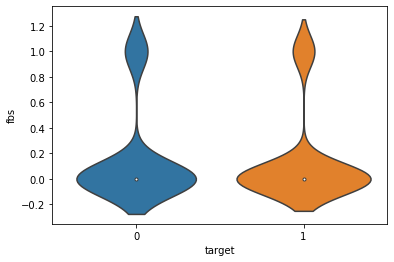

In [88]:
# create subplot plot
print(df[['target','fbs']].head())


# create violinplot plot using groupby
print(df[''])
sns.violinplot(data=df,x='target',y="fbs")
plt.show()

#### Observations:
   

## Box Plot
a box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, 

### 1.8 d)create a box plot for Sex & Age . And your Observations?

In [4]:
# create boxplot


### Observations: 
    

# 1.9 Categorical vs. Categorical

* Categorical: target, Sex.

### Stacked bar chart

A stacked bar chart, also known as a stacked bar graph, is a graph that is used to break down and compare parts of a whole. Each bar in the chart represents a whole, and segments in the bar represent different parts or categories of that whole. Different colors are used to illustrate the different categories in the bar.



### 1.9a) Create a Stacked bar chart for showing target & Sex. And your Observations?

In [5]:
#create crosstab



#### Observations:
    
    

# 1.10 Quantitative vs. Quantitative

### 1.10a) Create a scatter plot for showing age & st_depression. And your Observations?¶

Observation:
   

# 2. Seasonality and looking at trended data:


### 2. 1 Create a Seasonality and looking at trended data. And write your Observations?


In [6]:
#Load the data = AirPassengers.csv



# Plot subplot 


Observations:


# THE END